<a href="https://colab.research.google.com/github/AYUSH19VERMA/Pipeline-_Project/blob/main/amici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install libatlas-base-dev swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libatlas-base-dev is already the newest version (3.10.3-5).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 4s (309 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This

In [ ]:
!pip3 install amici

     |████████████████████████████████| 901kB 4.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for amici: filename=amici-0.11.17-cp37-cp37m-linux_x86_64.whl size=13304997 sha256=603e9a1348b28276b59f9323eb4ff7bf52366020c1b1cc4a518d2df616619880
  Stored in directory: /root/.cache/pip/wheels/28/e9/2c/e965602ea49d9cfb77d402e093c6eac0d21851baa81f360813
Successfully built amici


In [ ]:
pip install yaml2sbml

     |████████████████████████████████| 92kB 3.6MB/s 
     |████████████████████████████████| 6.2MB 20.4MB/s 
     |████████████████████████████████| 645kB 31.5MB/s 
ERROR: petab 0.1.19 has requirement pandas>=1.2.0, but you'll have pandas 1.1.5 which is incompatible.
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import yaml2sbml

yaml_file_basic = 'YML_File_Model.yml'
yaml2sbml.validate_yaml(yaml_dir=yaml_file_basic)
sbml_output_file = 'YML_File_Model.xml'
yaml2sbml.yaml2sbml(yaml_file_basic, sbml_output_file)

YAML file is valid ✅


In [ ]:
%%capture
import amici
import amici.plotting

model_name = 'upgrade'
model_output_dir = 'upgrade_AMICI'


sbml_importer = amici.SbmlImporter(sbml_output_file)
sbml_importer.sbml2amici(model_name, model_output_dir)

In [ ]:
import os
import sys
import importlib
import numpy as np
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# import model
sys.path.insert(0, os.path.abspath(model_output_dir))
model_module = importlib.import_module(model_name)

# create model + solver instance
model = model_module.getModel()
solver = model.getSolver()

# Define time points and run simulation using default model parameters/solver options
model.setTimepoints(np.linspace(0, 48, 201)) 
rdata = amici.runAmiciSimulation(model, solver)


(10000.0, 10000000.0)

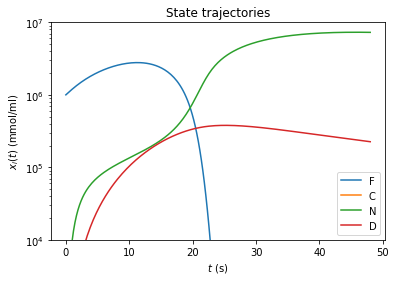

In [ ]:
# plot trajectories
amici.plotting.plotStateTrajectories(rdata, model=model)
plt.yscale("log",)
plt.ylim(1e4,1e7)    